In [6]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
%matplotlib notebook
%matplotlib inline
from config import postgresql_pass


In [7]:
# Connect to the database
username = "postgres"
password = postgresql_pass
database = "sql-challenge_db"
DATABASE_URI = 'postgres://' + username + ":" + password + "@localhost/" + database
# print(DATABASE_URI)
# Connect to the database
engine = create_engine(DATABASE_URI)
connection = engine.connect()


In [8]:
# Use Pandas to read the SQL Data
employees_df = pd.read_sql_table("employees", connection)
salaries_df = pd.read_sql_table("salaries", connection)
titles_df = pd.read_sql_table("titles", connection)

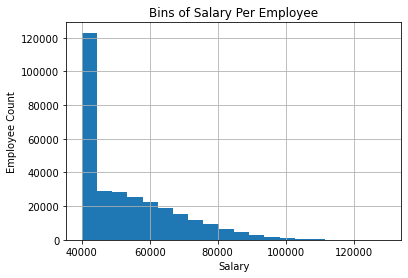

In [12]:
# Create a histogram to visualize the most common salary ranges for employees.
salary_ranges_df = pd.merge(employees_df, salaries_df, how="inner", on="emp_no")
salary_ranges_df.describe()
salary_ranges_df.hist(column='salary', bins=20)
plt.xlabel("Salary")
plt.ylabel("Employee Count")
plt.title("Bins of Salary Per Employee")
plt.savefig("./Images/SalaryPerEmployee.png", bbox_inches='tight')

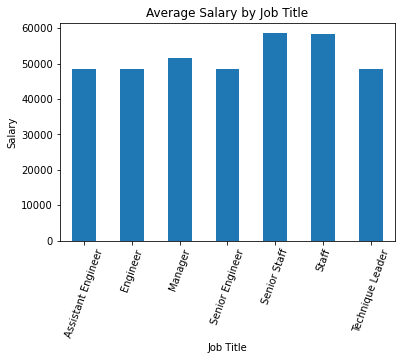

In [10]:
# Create a bar chart of average salary by title.
employee_title_df = pd.merge(employees_df, titles_df, how="inner", left_on="emp_title_id", right_on="title_id")
employee_title_salary_df = pd.merge(employee_title_df, salaries_df, how="inner", on="emp_no")

employee_title_salary_group = employee_title_salary_df.groupby('title').mean()['salary']

employee_title_salary_group.plot.bar(legend=False, rot=70)
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.title("Average Salary by Job Title")
plt.savefig("./Images/AverageSalaryByJobTitle.png", bbox_inches='tight')